# A Deeper Listen into Spotify Data



---
# Project Context

- In today's day and age, there is a vast availability of music available from artists around the world. It is quite perplexing how music recommendation systems such as Spotify, Apple Music, and even Alexa are able to suggest songs based on previous preferences. I believe that this capability roots from being able to group similar songs into certain genres that can be chosen from based on user preference. To explore this possibility, I am going to analyze the data from Spotify.

# Project Introduction

- Through this data analysis project, I hope to explore and answer questions involving data from Spotify. At the end of this project, I hope to answer questions about how to analyze data in order to group similar songs together, what attributes affect the similarity between two songs, and how certain types of sounds are able to group songs into a genre.

- I expect to have done a lot of data cleaning, pre processing (especially identifying relavant features based on my observations), analysis, and visualization. These steps will hopefully answer the questions I have posed and convey the results of my analysis in an effective and efficient manner. I also aim to improve my knowledge about data analysis from the beginning stage of data cleaning all the way to the ending step of creating data visualizations for my results.

- My data is made up of 1750 rows. This data is from Spotify itself. It contains features such as the name of the song, name of the artist, and many other ratings that measure popularity, liveliness, energy, etc. that describe each song/record.

- I will be using data cleaning techniques such as removing unnecessary features, dealing with missing values appropriately, and removing duplicate values. In addition, I will be using K-means clustering. Lastly, I also plan to use matplotlib for visualization purposes.



In [ ]:
%%html
<div style="font-size:36px; max-width:800px; font-family:Times, serif;">
 A Deeper Listen into Spotify Data
<video width="600" controls>
  <source src="https://drive.google.com/uc?export=download&id=1RBc0NdgrcR-e07lHzF4Tqg5nK_KEIu4o"
  type="video/mp4">
</video>
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Data Acquisition, Selection, Cleaning


The data used in the following code cell is from a Spotify Data Science Competition hosted by Kaggle: https://www.kaggle.com/c/bfh-spotify-challenge 

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1xdu0ycIjR5EDpcZTRHMhu_26M9BVmRleGWEj6yM2y5U/export?format=csv'
df = pd.read_csv(sheet_url)
print(df.shape)
df.head()

(1750, 16)


,id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,Anyone,Anyone,Justin Bieber,1/1/21,190779,92,0.686,0.1810,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4
1,1,Therefore I Am,Therefore I Am,Billie Eilish,11/12/20,174321,93,0.889,0.2180,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4
2,2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,12/10/18,165819,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4
3,3,34+35,Positions,Ariana Grande,10/30/20,173710,93,0.830,0.2370,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4
4,4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,11/1/94,241106,89,0.336,0.1640,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4


# Data Exploration

In [ ]:
# dropping unnecessary columns
df = df.drop('id', axis = 1)
print('shape after id column is dropped', df.shape)

shape after id column is dropped (1750, 15)


In [ ]:
# learning information about the dataset
df.describe()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,195436.638286,69.506286,0.651688,0.298371,0.592553,0.053457,0.177332,-7.867144,0.118890,122.115411,3.932000
std,47465.014667,24.158489,0.175828,0.301546,0.205806,0.195213,0.129798,5.190363,0.112192,31.493535,0.396459
min,34533.000000,0.000000,0.000000,0.000035,0.000020,0.000000,0.032700,-40.449000,0.000000,0.000000,0.000000
25%,167280.500000,68.000000,0.553250,0.051825,0.479000,0.000000,0.101000,-8.440250,0.040200,94.736000,4.000000
50%,193838.000000,77.000000,0.671000,0.183000,0.623000,0.000000,0.125000,-6.522000,0.064850,123.049500,4.000000
75%,222346.000000,83.000000,0.779000,0.499000,0.739750,0.000095,0.213750,-5.131750,0.160000,143.929000,4.000000
max,530253.000000,100.000000,0.980000,0.996000,0.997000,1.000000,0.945000,-1.465000,0.777000,211.968000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1750 non-null   object 
 1   album             1750 non-null   object 
 2   artist            1750 non-null   object 
 3   release_date      1750 non-null   object 
 4   length            1750 non-null   int64  
 5   popularity        1750 non-null   int64  
 6   danceability      1750 non-null   float64
 7   acousticness      1750 non-null   float64
 8   energy            1750 non-null   float64
 9   instrumentalness  1750 non-null   float64
 10  liveness          1750 non-null   float64
 11  loudness          1750 non-null   float64
 12  speechiness       1750 non-null   float64
 13  tempo             1750 non-null   float64
 14  time_signature    1750 non-null   int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 205.2+ KB


# Data Cleaning/Normalization

The data cleaning/normalization techniques I will use are

1) Converting units

2) Removing duplicate rows

3) Filtering data based on relevant features. Meaning, I am going to drop certain columns from the dataset that are redundant or irrelevant

In [ ]:
# converting time ('length') to minutes because we usually discuss how long songs are in mins
df['length'] = df['length']/(60*1000)
df= df[df["popularity"] > 60]

In [ ]:
# removing duplicate rows
df.sort_values('name', ascending = False)
df.drop_duplicates(keep='first', inplace=True)
df.sort_values("name", ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
923,‘tis the damn season,evermore,Taylor Swift,12/11/20,3.830667,81,0.575,0.7350,0.4340,0.000066,0.1050,-8.193,0.0312,145.916,4
1012,you were good to me,brent,Jeremy Zucker,5/3/19,3.652433,81,0.561,0.9130,0.0848,0.000026,0.1120,-15.099,0.0404,102.128,4
1038,you should see me in a crown,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,3/29/19,3.015867,79,0.678,0.4620,0.5330,0.219000,0.1390,-10.485,0.1860,150.455,4
63,you broke me first,you broke me first,Tate McRae,4/17/20,2.821083,92,0.642,0.7860,0.3740,0.000000,0.0906,-9.386,0.0545,124.099,4
1152,xanny,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,3/29/19,4.062083,75,0.521,0.7510,0.1250,0.002070,0.2650,-17.832,0.2390,111.554,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,00:00 (Zero O’Clock),MAP OF THE SOUL : 7,BTS,2/21/20,4.171583,73,0.566,0.0802,0.5480,0.000000,0.1100,-6.456,0.0579,157.999,4
1250,0 To 100 / The Catch Up,0 To 100 / The Catch Up,Drake,7/14/13,4.587100,70,0.559,0.7370,0.7160,0.000000,0.2520,-3.964,0.3900,176.618,4
1261,"0 Sentimientos (Remix) [feat. Noriel, Darkiel,...","0 Sentimientos (Remix) [feat. Noriel, Darkiel,...",Jon Z,11/24/16,5.595600,66,0.894,0.1550,0.7210,0.000000,0.1540,-5.829,0.2580,107.963,4
1258,0,EXOTIGAZ,A.CHAL,12/8/18,2.753567,62,0.734,0.4940,0.4720,0.002930,0.1020,-8.192,0.3060,190.011,4


In [ ]:
print(df.shape)

(951, 15)


# Data Analysis

The analysis that I will use with the now clean data is the following:

1) Visualize data to see scatterplots and correlation plots

2) Based on the plots, decide which features to use for KMeans clustering

The reason I choose to use KMeans clustering is because it is able to create clusters based on the features it is passed in. This is relevant to my dataset because I want to "group" or "cluster" the songs/genres based on the features given. This will also be very helpful in the future for visualizations and for predictions of genres for new songs.

<Figure size 1152x576 with 0 Axes>

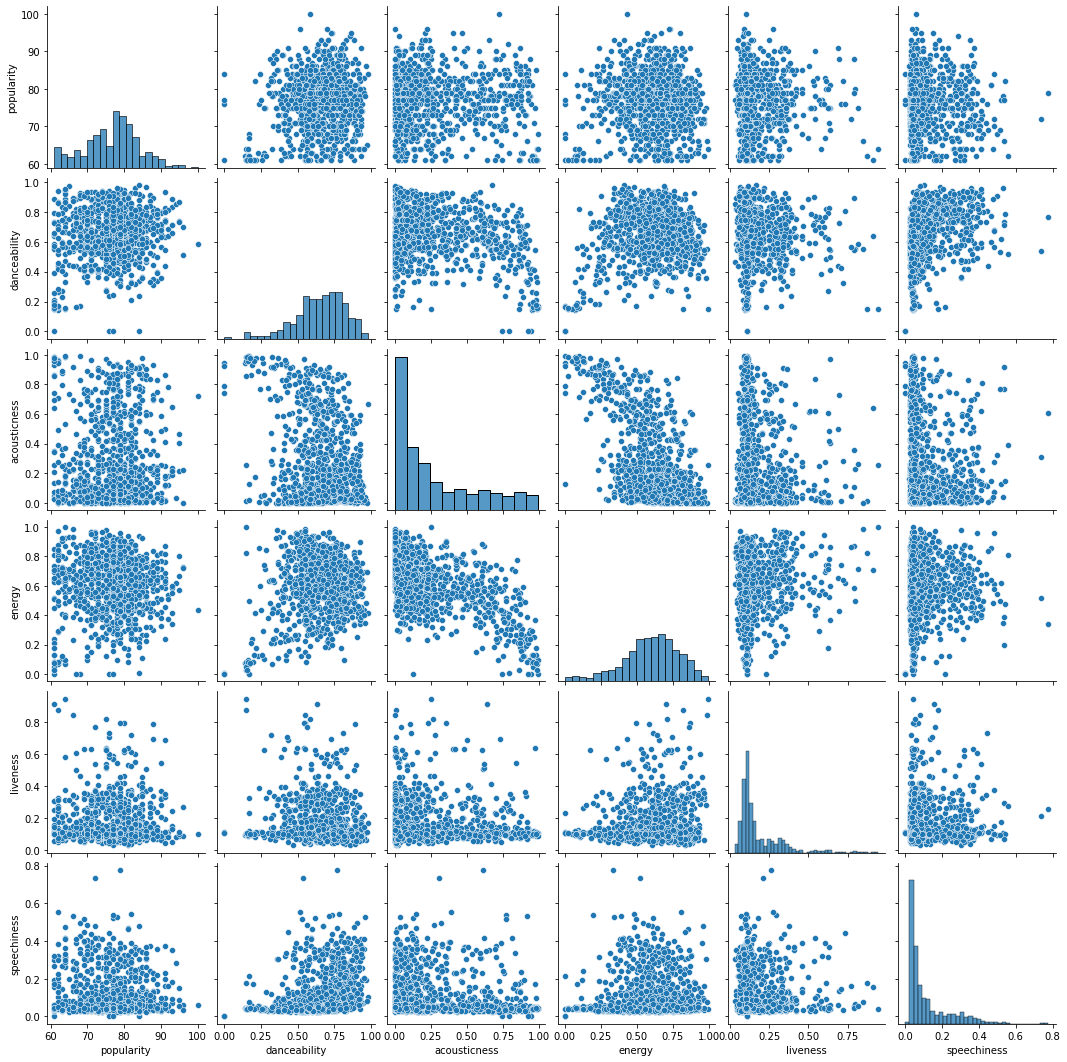

In [ ]:
# plotting a subset of diverse features to understand the relationships

plt.figure(figsize = (16,8))
sns.pairplot(df[['popularity','danceability', 'acousticness', 'energy', 'liveness', 'speechiness']], height = 2.5)
plt.show()

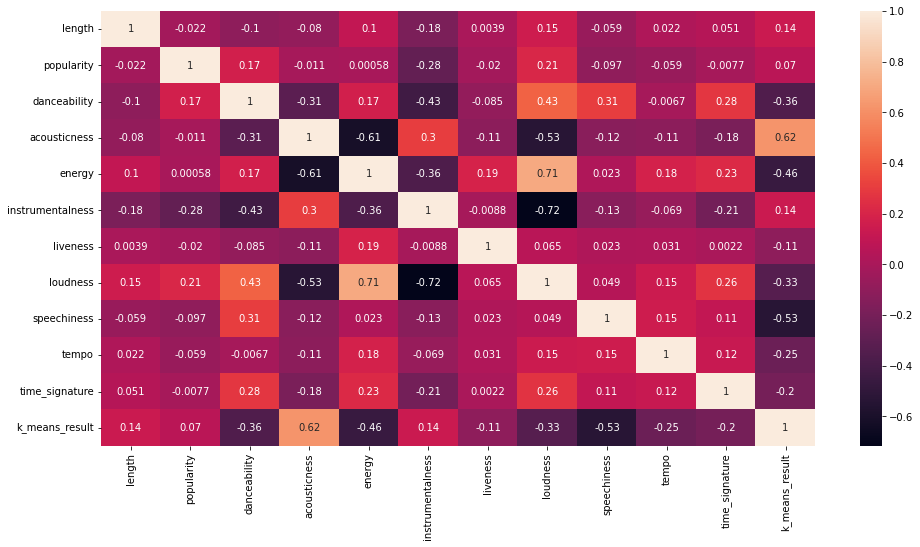

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
processed_df = df.drop(['name','album','artist','release_date','popularity'], axis=1)
processed_df = pd.DataFrame(scaler.fit_transform(processed_df), columns = processed_df.columns)
print(processed_df.shape)

(951, 11)


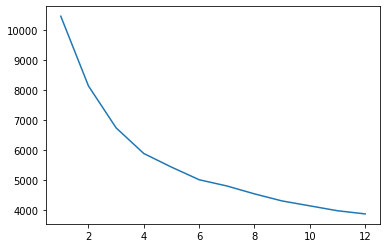

In [ ]:
# using the elbow method to determine the number of clusters

elbow_method_y_values = []
for num_clusters in range(1, 12+1):
  potential_k_means_model = KMeans(n_clusters = num_clusters, init = 'k-means++', n_init = 12, max_iter = 300, random_state = 42)
  potential_k_means_model.fit(processed_df)
  elbow_method_y_values.append(potential_k_means_model.inertia_)

plt.plot(range(1, 12+1), elbow_method_y_values)
plt.show()

In [ ]:
num_clusters = 4
k_means_model = KMeans(n_clusters = 4, init = 'k-means++', n_init = 12, max_iter = 300, random_state = 0)
k_means_result = k_means_model.fit_predict(processed_df)

In [ ]:
df['k_means_result'] = k_means_result

In [ ]:
df.head(20)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_means_result
0,Anyone,Anyone,Justin Bieber,1/1/21,3.179650,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,1
1,Therefore I Am,Therefore I Am,Billie Eilish,11/12/20,2.905350,93,0.889,0.21800,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4,2
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,12/10/18,2.763650,86,0.671,0.07690,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,3
3,34+35,Positions,Ariana Grande,10/30/20,2.895167,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,1
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,11/1/94,4.018433,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,1
5,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,3/22/19,2.966667,84,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4,1
6,After Party,Heaven Or Hell,Don Toliver,3/13/20,2.798583,83,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4,1
7,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,7/3/20,3.174600,91,0.823,0.11400,0.586,0.000000,0.1930,-6.606,0.2000,125.971,4,3
8,Afterglow,Afterglow,Ed Sheeran,12/21/20,3.091433,90,0.641,0.69800,0.324,0.000000,0.3280,-5.851,0.0299,110.184,4,2
9,positions,Positions,Ariana Grande,10/30/20,2.872067,95,0.737,0.46800,0.802,0.000000,0.0931,-4.771,0.0878,144.015,4,1


In [ ]:
cluster_num_0 = df[df['k_means_result'] == 0]
cluster_num_1 = df[df['k_means_result'] == 1] 
cluster_num_2 = df[df['k_means_result'] == 2] 
cluster_num_3 = df[df['k_means_result'] == 3] 

df.k_means_result.value_counts()

1    493
2    231
3    197
0     30
Name: k_means_result, dtype: int64

In [ ]:
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_means_result
0,Anyone,Anyone,Justin Bieber,1/1/21,3.179650,92,0.686,0.1810,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,1
1,Therefore I Am,Therefore I Am,Billie Eilish,11/12/20,2.905350,93,0.889,0.2180,0.340,0.130000,0.0550,-7.773,0.0697,94.009,4,3
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,12/10/18,2.763650,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.3070,161.989,4,0
3,34+35,Positions,Ariana Grande,10/30/20,2.895167,93,0.830,0.2370,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,1
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,11/1/94,4.018433,89,0.336,0.1640,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,1


In [ ]:
genres = ['Coming of Age', 'Pop Style', 'Alternative Style', 'Rap Or Hip Hop']
clustered_df = pd.DataFrame(cluster_num_0.mean(), columns = [genres[0]])
clustered_df.insert(1, genres[1], cluster_num_1.mean())
clustered_df.insert(2, genres[2], cluster_num_2.mean())
clustered_df.insert(3, genres[3], cluster_num_3.mean())

In [ ]:
clustered_df

,Coming of Age,Pop Style,Alternative Style,Rap Or Hip Hop
length,2.310758,3.391186,3.587520,3.178527
popularity,64.466667,76.914807,78.216450,75.908629
danceability,0.201600,0.659189,0.599961,0.769995
acousticness,0.806987,0.134896,0.590175,0.189174
energy,0.157878,0.702258,0.431667,0.595832
instrumentalness,0.817500,0.013905,0.022619,0.004353
liveness,0.169287,0.197787,0.146592,0.174229
loudness,-27.088967,-5.763396,-9.270576,-7.035797
speechiness,0.054730,0.072128,0.069115,0.308244
tempo,105.548033,123.826353,111.785286,134.213949


# Summary

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature',
       'k_means_result'],
      dtype='object')


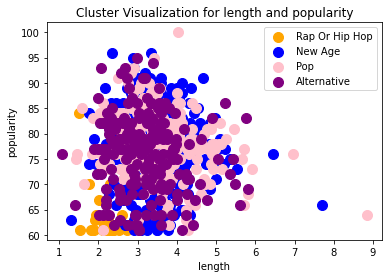

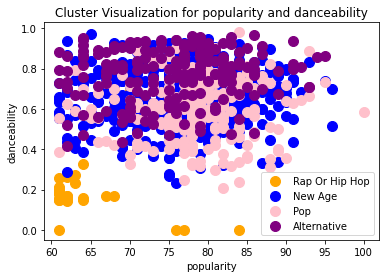

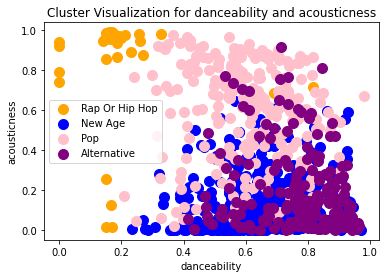

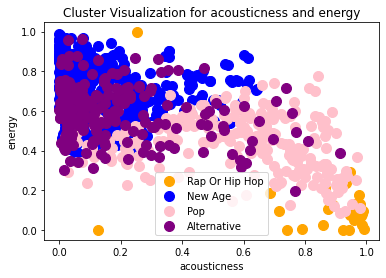

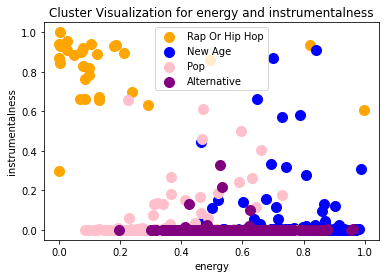

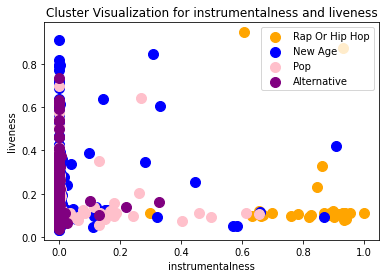

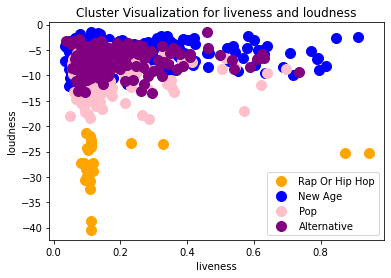

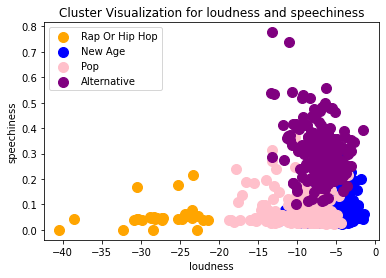

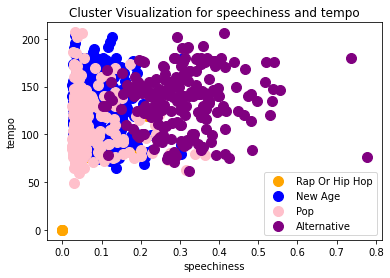

In [ ]:
df_cols = df.columns
print(df_cols)
for i in range(4, 12+1):
  one = df_cols[i]
  two = df_cols[i + 1]
  plt.scatter(cluster_num_0[one], cluster_num_0[two], s=100, c='orange', label ='Rap Or Hip Hop')
  plt.scatter(cluster_num_1[one], cluster_num_1[two], s=100, c='blue', label ='New Age')
  plt.scatter(cluster_num_2[one], cluster_num_2[two], s=100, c='pink', label ='Pop')
  plt.scatter(cluster_num_3[one], cluster_num_3[two], s=100, c='purple', label ='Alternative')
  plt.title('Cluster Visualization for {} and {}'.format(one, two))
  plt.xlabel(one)
  plt.ylabel(two)
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


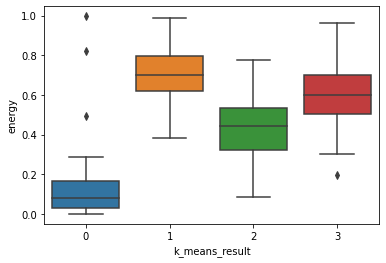

In [ ]:
sns.boxplot(df.k_means_result,df.energy)

In [ ]:
cluster_num_0.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_means_result
129,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,Erik Eriksson,1/8/17,1.503800,84,0.000,0.7910,0.003420,1.000,0.111,-28.460,0.0000,0.000,0,0
1075,Zen Thunder,Zen Thunder,Zen Master,8/9/20,2.983333,62,0.149,0.0122,0.820000,0.933,0.872,-25.268,0.1770,83.354,4,0
1081,ZzzzZ 1.4 kHz,Ocean of White Noise,Wavelab,6/9/20,2.125000,61,0.000,0.7430,0.000458,0.939,0.111,-22.879,0.0000,0.000,0,0
1116,Querencia,Querencia,Cameron Sinosa,11/5/20,3.244133,68,0.170,0.9910,0.003160,0.931,0.111,-38.615,0.0422,70.964,3,0
1123,Quiet Rain in River,Rain White Noise,Stereo Outdoor Sampling,10/10/19,2.001383,67,0.166,0.1250,0.001330,0.846,0.233,-23.291,0.2150,119.669,4,0


In [ ]:
cluster_num_1.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_means_result
0,Anyone,Anyone,Justin Bieber,1/1/21,3.179650,92,0.686,0.18100,0.538,0.000003,0.1130,-8.026,0.0345,115.884,4,1
3,34+35,Positions,Ariana Grande,10/30/20,2.895167,93,0.830,0.23700,0.585,0.000000,0.2480,-6.476,0.0940,109.978,4,1
4,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,11/1/94,4.018433,89,0.336,0.16400,0.627,0.000000,0.0708,-7.463,0.0384,150.273,4,1
5,Are You Bored Yet? (feat. Clairo),Nothing Happens,Wallows,3/22/19,2.966667,84,0.682,0.15600,0.683,0.000023,0.2730,-6.444,0.0287,120.023,4,1
6,After Party,Heaven Or Hell,Don Toliver,3/13/20,2.798583,83,0.629,0.00981,0.692,0.331000,0.6030,-8.045,0.0376,162.948,4,1


In [ ]:
cluster_num_2.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_means_result
1,Therefore I Am,Therefore I Am,Billie Eilish,11/12/20,2.905350,93,0.889,0.2180,0.340,0.13,0.0550,-7.773,0.0697,94.009,4,2
8,Afterglow,Afterglow,Ed Sheeran,12/21/20,3.091433,90,0.641,0.6980,0.324,0.00,0.3280,-5.851,0.0299,110.184,4,2
13,Rockin' Around The Christmas Tree,Merry Christmas From Brenda Lee,Brenda Lee,10/19/64,2.104433,86,0.589,0.6140,0.472,0.00,0.5050,-8.749,0.0502,67.196,4,2
23,"All I Want - From ""High School Musical: The Mu...","All I Want (From ""High School Musical: The Mus...",Olivia Rodrigo,11/27/19,2.955367,82,0.376,0.0902,0.430,0.00,0.0912,-6.585,0.0328,77.599,3,2
27,A Holly Jolly Christmas - Single Version,Have A Holly Jolly Christmas,Burl Ives,1/1/65,2.258883,74,0.683,0.5790,0.375,0.00,0.0760,-13.056,0.0303,140.467,4,2


In [ ]:
cluster_num_3.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,k_means_result
2,All Girls Are The Same,Goodbye & Good Riddance,Juice WRLD,12/10/18,2.763650,86,0.671,0.0769,0.529,0.000335,0.0856,-7.226,0.307,161.989,4,3
7,For The Night (feat. Lil Baby & DaBaby),Shoot For The Stars Aim For The Moon,Pop Smoke,7/3/20,3.174600,91,0.823,0.1140,0.586,0.000000,0.1930,-6.606,0.200,125.971,4,3
18,Armed And Dangerous,Goodbye & Good Riddance,Juice WRLD,12/10/18,2.833317,80,0.736,0.1860,0.670,0.000000,0.1140,-6.702,0.311,130.032,4,3
19,Martin & Gina,THE GOAT,Polo G,5/15/20,2.213867,84,0.832,0.3450,0.534,0.000000,0.1650,-7.813,0.253,93.924,4,3
20,ALWAYS DO,F*CK LOVE (SAVAGE),The Kid LAROI,11/6/20,2.528400,82,0.762,0.0442,0.426,0.000000,0.0858,-6.865,0.113,167.827,4,3


# Conclusion
What I learned from preprocessing
- I learned about the importance of data preprocessing in general and also about the specific input data requirements for the analysis technique I used which is K-means clustering.
  - In general, I learned that different machine learning models have different types of input data for the most effective analysis. Moreover, using unpreprocessed data may result in confusing or inaccurate results when testing the model. Lastly, I also read about how using a smaller quantity of good quality data is better for achieving the desired results than using a larger quantity of bad quality data. I kept all of these ideas in mind when preprocessing my data for this project.
  - Specifically for k-means clustering, I ensured that my preprocessed data was numerical, on the same scale, has no collinearity, and has fewer number of features or dimensions.

What I learned from analysis
- Through analysing my data and reflecting on the results, I learned about some advantages and disadvantages. 
  - K-means clustering scaled well to the large amount of data I used and can create starting clusters with relative accuracy; I especially noticed this when I was optimizing the number of clusters. 
  - Some disadvantages to this approach was that some outliers (which were not removed by preprocessing) were pulling the closest cluster in the wrong direction. I hope to learn more about how to deal with this issue in the future.

What I learned from summary and visualizations
- As a visual learner myself, I believe that the most interesting part of my project is seeing all of the clusters for various combinations of features. These visualizations are a fount of knowledge for understanding how each of the features impact how the data points (songs) are accurately clustered (genres). 